In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Weighted median

For MAPE metric the best constant prediction is [weighted median](https://en.wikipedia.org/wiki/Weighted_median) with weights

$$w_i = \frac{\sum_{j=1}^N \frac{1}{x_j}}{x_i}$$

for each object $x_i$.

This notebook exlpains how to compute weighted median. Let's generate some data first, and then find it's weighted median.

In [3]:
N = 5
x = np.random.randint(low=1, high=100, size=N)
print(x)

[49 23 72 40 57]


1) Compute *normalized* weights:

In [4]:
inv_x = 1.0/x
inv_x

array([0.02040816, 0.04347826, 0.01388889, 0.025     , 0.01754386])

In [5]:
w = inv_x/sum(inv_x)
w

array([0.16961688, 0.36135771, 0.11543371, 0.20778068, 0.14581101])

2) Now sort the normalized weights. We will use `argsort` (and not just `sort`) since we will need indices later.

In [6]:
idxs = np.argsort(w)
idxs

array([2, 4, 0, 3, 1])

In [7]:
sorted_w = w[idxs]
sorted_w

array([0.11543371, 0.14581101, 0.16961688, 0.20778068, 0.36135771])

3) Compute [cumulitive sum](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html) of sorted weights

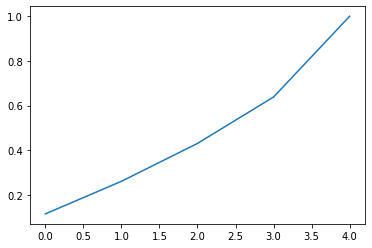

sorted_w_cumsum:  [0.11543371 0.26124472 0.4308616  0.63864229 1.        ]


In [8]:
sorted_w_cumsum = np.cumsum(sorted_w)
plt.plot(sorted_w_cumsum); plt.show()
print ('sorted_w_cumsum: ', sorted_w_cumsum)

4) Now find the index when cumsum hits 0.5:

In [9]:
idx = np.where(sorted_w_cumsum>0.5)[0][0]
idx

3

5) Finally, your answer is sample at that position:

In [10]:
pos = idxs[idx]
x[pos]

40

In [11]:
print('Data: ', x)
print('Sorted data: ', np.sort(x))
print('Weighted median: %d, Median: %d' %(x[pos], np.median(x)))

Data:  [49 23 72 40 57]
Sorted data:  [23 40 49 57 72]
Weighted median: 40, Median: 49


Thats it! 

If the procedure looks surprising for you, try to do steps 2--5 assuming the weights are $w_i=\frac{1}{N}$. That way you will find a simple median (not weighted) of the data. 